In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2022,1,AA,American Airlines Inc.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",508.0,36.0,17.25,0.91,...,0.0,9.22,15.0,0.0,1599.0,647.0,40.0,277.0,0.0,635.0
6996,2022,1,AA,American Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",119.0,15.0,5.97,0.22,...,0.0,4.87,5.0,0.0,901.0,364.0,33.0,194.0,0.0,310.0
6997,2022,1,AA,American Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",638.0,107.0,55.74,1.41,...,0.0,26.53,25.0,1.0,6548.0,3617.0,145.0,934.0,0.0,1852.0
6998,2022,1,AA,American Airlines Inc.,STT,"Charlotte Amalie, VI: Cyril E King",199.0,45.0,20.08,0.41,...,0.0,5.60,8.0,0.0,2954.0,1322.0,47.0,1091.0,0.0,494.0


In [4]:
data.shape

(7000, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 7000 non-null   int64  
 1   month                7000 non-null   int64  
 2   carrier              7000 non-null   object 
 3   carrier_name         7000 non-null   object 
 4   airport              7000 non-null   object 
 5   airport_name         7000 non-null   object 
 6   arr_flights          6998 non-null   float64
 7   arr_del15            6996 non-null   float64
 8   carrier_ct           6998 non-null   float64
 9   weather_ct           6996 non-null   float64
 10  nas_ct               6998 non-null   float64
 11  security_ct          6998 non-null   float64
 12  late_aircraft_ct     6998 non-null   float64
 13  arr_cancelled        6998 non-null   float64
 14  arr_diverted         6996 non-null   float64
 15  arr_delay            6998 non-null   f

In [6]:
set([(i).isalpha() for i in data['airport'].tolist()])

{False, True}

In [7]:
[i  for i in data['airport'].tolist() if not i.isalpha()]

['ATW5', 'BOI?']

In [8]:
[i  for i in data['airport'].tolist() if not i.isalnum()]

['BOI?']

In [9]:
[i  for i in data['airport_name'].tolist() if '#' in i]

['Salt Lak#e City, UT: Salt Lake City International']

In [10]:
a = 'hi5'

a.isalpha()

False

In [13]:
data['month'].value_counts()

4    1717
3    1703
5    1697
2    1669
1     214
Name: month, dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7000.0,2022.000000,0.000000,2022.0,2022.00,2022.000,2022.0000,2022.00
month,7000.0,3.430571,1.179204,1.0,2.00,3.000,4.0000,5.00
arr_flights,6998.0,326.557016,892.387229,1.0,45.00,90.000,214.0000,18297.00
arr_del15,6996.0,66.562035,169.376343,0.0,7.00,17.000,47.0000,2713.00
carrier_ct,6998.0,24.982271,58.331900,0.0,2.89,7.550,20.2300,1012.39
weather_ct,6996.0,2.154315,7.499063,0.0,0.00,0.400,1.8025,208.82
nas_ct,6998.0,16.635191,51.305064,0.0,0.75,3.020,9.6075,1391.74
security_ct,6998.0,0.219153,0.831747,0.0,0.00,0.000,0.0000,16.06
late_aircraft_ct,6998.0,22.552189,64.976936,0.0,1.51,4.785,14.4600,1083.18
arr_cancelled,6998.0,8.451558,33.478367,0.0,0.00,1.000,5.0000,1565.00


In [16]:
ALBDataSet = data[data['airport']=='ALB']

In [17]:
ALBDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 5 to 6900
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 50 non-null     int64  
 1   month                50 non-null     int64  
 2   carrier              50 non-null     object 
 3   carrier_name         50 non-null     object 
 4   airport              50 non-null     object 
 5   airport_name         50 non-null     object 
 6   arr_flights          50 non-null     float64
 7   arr_del15            50 non-null     float64
 8   carrier_ct           50 non-null     float64
 9   weather_ct           50 non-null     float64
 10  nas_ct               50 non-null     float64
 11  security_ct          50 non-null     float64
 12  late_aircraft_ct     50 non-null     float64
 13  arr_cancelled        50 non-null     float64
 14  arr_diverted         50 non-null     float64
 15  arr_delay            50 non-null     flo

In [18]:
ALBDataSet.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2022.0,3.400000,81.120000,20.780000,10.123400,0.822000,3.450800,0.142200,6.242400,3.200000,0.240000,1286.020000,600.840000,98.140000,147.300000,6.020000,433.720000
std,0.0,1.212183,50.805608,17.576991,10.917488,1.090154,3.141529,0.351291,6.270348,3.070598,0.517451,1054.413029,591.348144,198.055034,136.135474,16.896431,491.366484
min,2022.0,1.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,2.000000,51.000000,11.000000,3.292500,0.000000,1.210000,0.000000,2.037500,1.000000,0.000000,502.250000,180.750000,0.000000,55.250000,0.000000,137.250000
50%,2022.0,3.000000,72.000000,16.500000,7.160000,0.290000,2.560000,0.000000,4.105000,3.000000,0.000000,934.000000,403.500000,12.000000,113.500000,0.000000,267.500000
75%,2022.0,4.000000,96.750000,24.750000,11.777500,1.007500,4.922500,0.000000,7.870000,5.000000,0.000000,1605.000000,798.000000,97.000000,197.750000,0.000000,513.500000
max,2022.0,5.000000,227.000000,84.000000,54.700000,5.000000,15.280000,1.230000,27.690000,14.000000,2.000000,4670.000000,2638.000000,1006.000000,532.000000,97.000000,1966.000000


In [19]:
ALBDataSet.to_csv('ALBDataset.csv')

In [21]:
data[data['late_aircraft_ct']<=5]['month'].value_counts()

2    940
5    872
3    864
4    846
1    122
Name: month, dtype: int64

In [28]:
data[data['carrier']=='AA'][data['month']==5][data['weather_ct']<5][data['airport']== 'ALB'][data['arr_flights']<5]

C:\Users\hesha\AppData\Local\Temp\ipykernel_9648\2875367027.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['carrier']=='AA'][data['month']==5][data['weather_ct']<5][data['airport']== 'ALB'][data['arr_flights']<5]


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [29]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2022,1,AA,American Airlines Inc.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",508.0,36.0,17.25,0.91,...,0.0,9.22,15.0,0.0,1599.0,647.0,40.0,277.0,0.0,635.0
6996,2022,1,AA,American Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",119.0,15.0,5.97,0.22,...,0.0,4.87,5.0,0.0,901.0,364.0,33.0,194.0,0.0,310.0
6997,2022,1,AA,American Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",638.0,107.0,55.74,1.41,...,0.0,26.53,25.0,1.0,6548.0,3617.0,145.0,934.0,0.0,1852.0
6998,2022,1,AA,American Airlines Inc.,STT,"Charlotte Amalie, VI: Cyril E King",199.0,45.0,20.08,0.41,...,0.0,5.60,8.0,0.0,2954.0,1322.0,47.0,1091.0,0.0,494.0


In [30]:
data['carrier'].nunique()

17

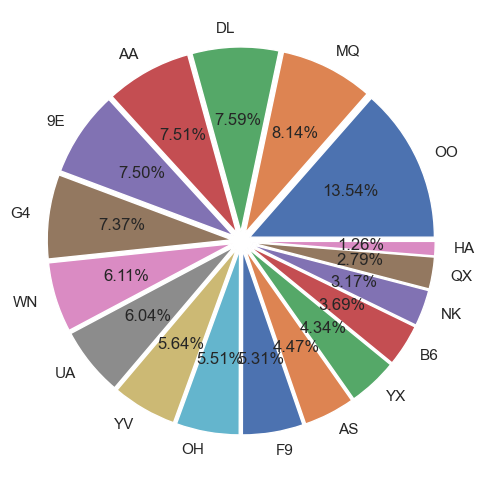

In [39]:
def Pie(feature,Limit=10) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],
            labels=list(data[feature].value_counts()[:Limit].index),
            autopct ='%1.2f%%' ,
            labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()
    
Pie('carrier',Limit = 17)    

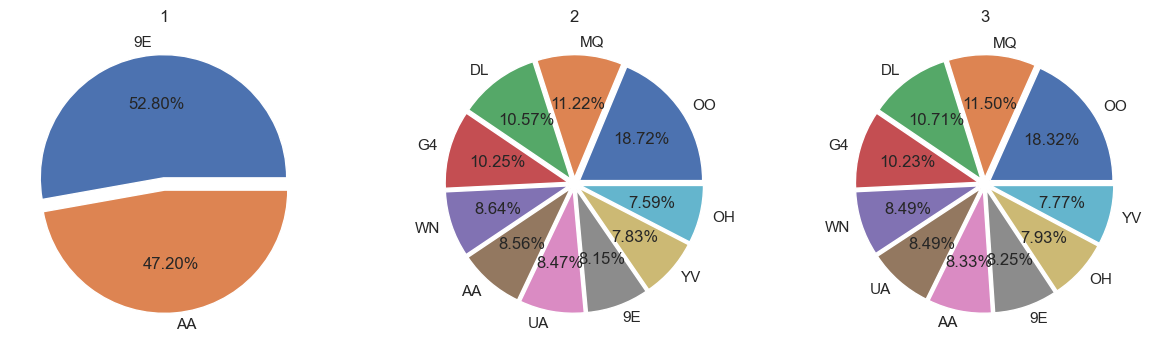

In [36]:
def SelectedFeaturePie(feature,Limit=10) : 
    Feature = 'month'
    Values = [1,2,3]
    global data
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,3,1)
    plt.title(Values[0])
    Data = data[data[Feature]==Values[0]]
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,3,2)
    plt.title(Values[1])
    Data = data[data[Feature]==Values[1]]
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,3,3)
    plt.title(Values[2])
    Data = data[data[Feature]==Values[2]]
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
    plt.show()     
SelectedFeaturePie('carrier')    

In [35]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2022,1,AA,American Airlines Inc.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",508.0,36.0,17.25,0.91,8.63,0.0,9.22,15.0,0.0,1599.0,647.0,40.0,277.0,0.0,635.0
6996,2022,1,AA,American Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",119.0,15.0,5.97,0.22,3.94,0.0,4.87,5.0,0.0,901.0,364.0,33.0,194.0,0.0,310.0
6997,2022,1,AA,American Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",638.0,107.0,55.74,1.41,23.32,0.0,26.53,25.0,1.0,6548.0,3617.0,145.0,934.0,0.0,1852.0
6998,2022,1,AA,American Airlines Inc.,STT,"Charlotte Amalie, VI: Cyril E King",199.0,45.0,20.08,0.41,18.91,0.0,5.60,8.0,0.0,2954.0,1322.0,47.0,1091.0,0.0,494.0


C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


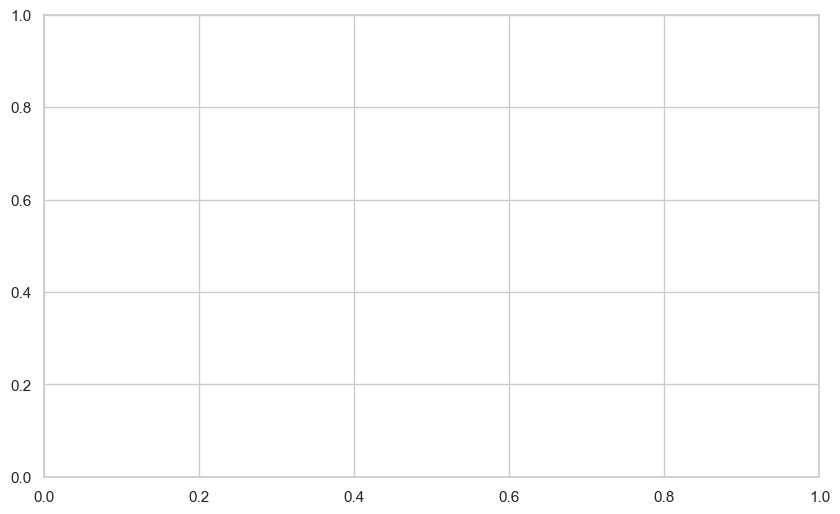

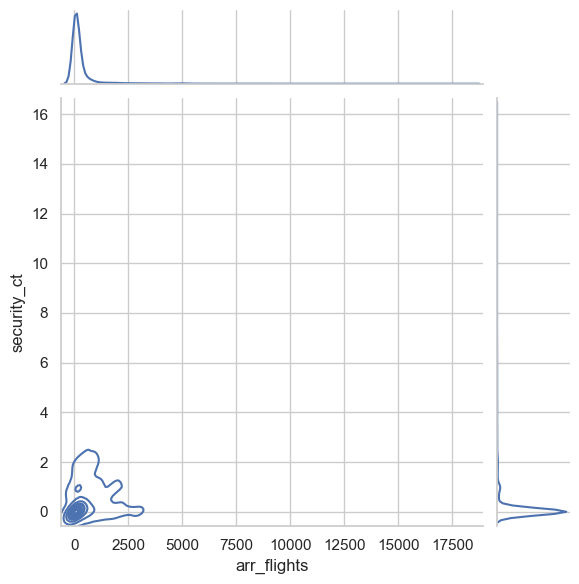

In [41]:
def JPlot(feature_1,feature_2) :
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    sns.jointplot(feature_1,feature_2 ,data, kind='kde')
    
    
JPlot('arr_flights','security_ct')    